In [1]:
"""Data Loading & Exploration"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# 1. Load the dataset
file_path = '/kaggle/input/diabetics/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv'
df = pd.read_csv(file_path, na_values='?')


/tmp/ipykernel_35/534786717.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, na_values='?')


Step 2: Data Loading & Exploration

Dataset shape: (101766, 50)

First 5 rows:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide

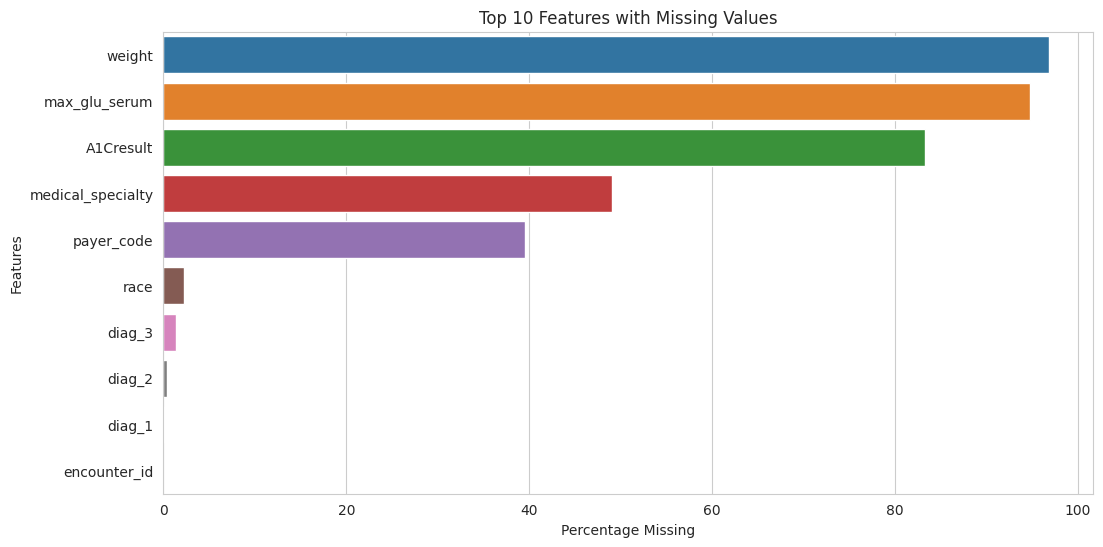

In [4]:
# 2. Initial Exploration
print("="*50)
print("Step 2: Data Loading & Exploration")
print("="*50)

# Basic dataset info
print(f"\nDataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes.value_counts())

# Missing value analysis
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_values / len(df)) * 100
missing_df = pd.concat([missing_values, missing_pct], axis=1, keys=['Count', '%'])
print("\nMissing values:")
print(missing_df.head(10))

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_pct.head(10).values, y=missing_pct.head(10).index)
plt.title('Top 10 Features with Missing Values')
plt.xlabel('Percentage Missing')
plt.ylabel('Features')
plt.show()


Target variable distribution:
readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

Numerical features summary:
                             count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency       

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


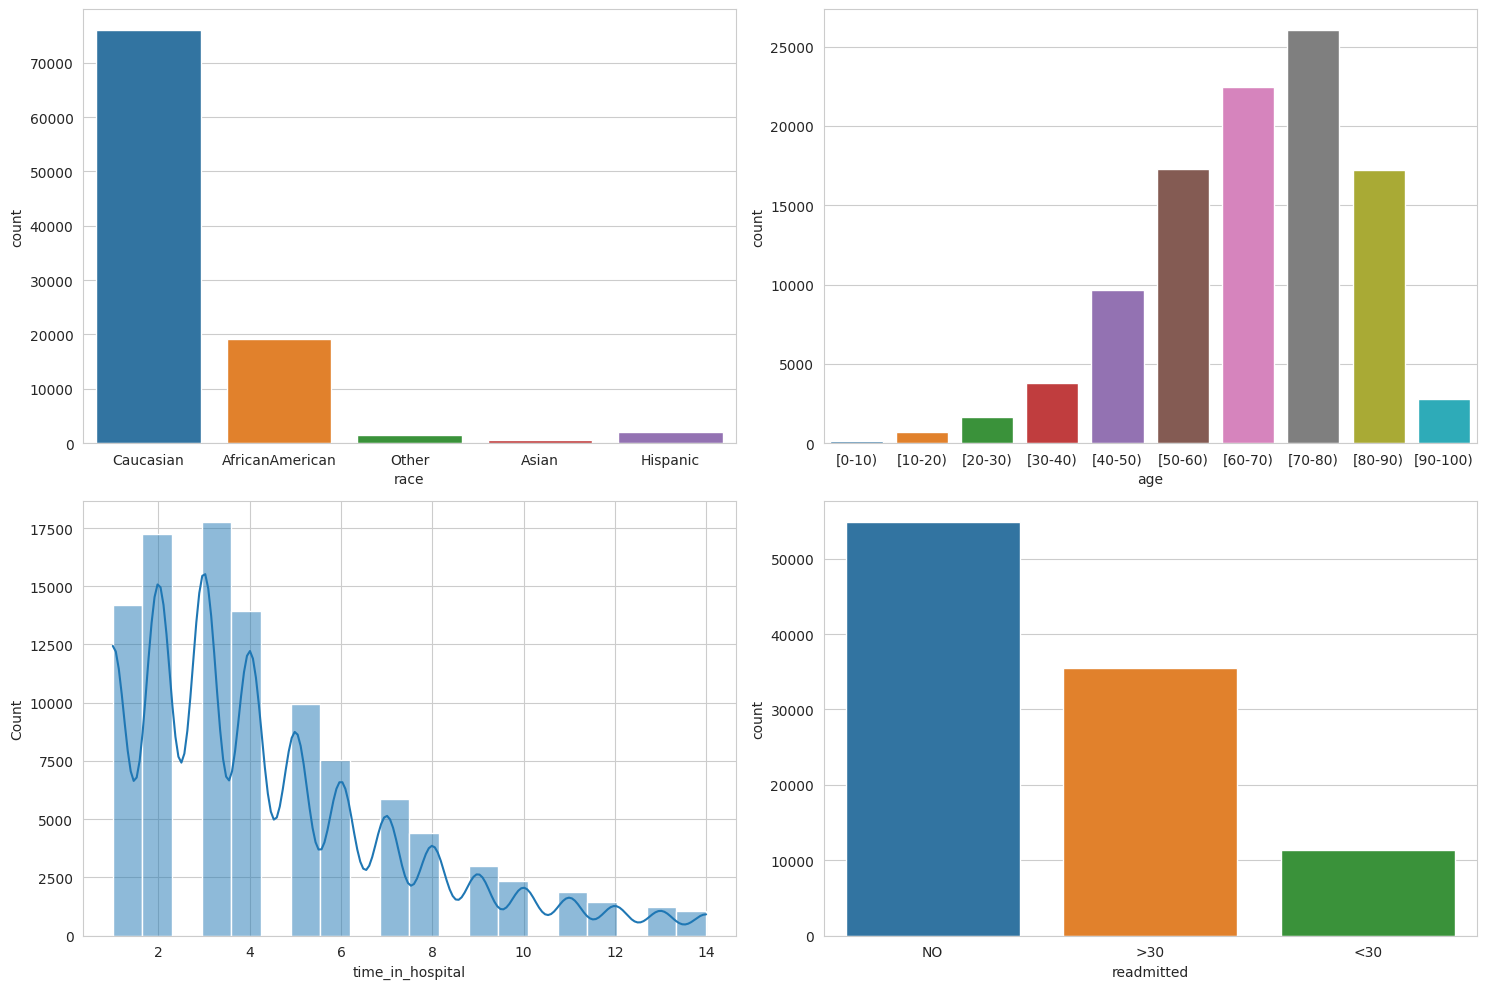

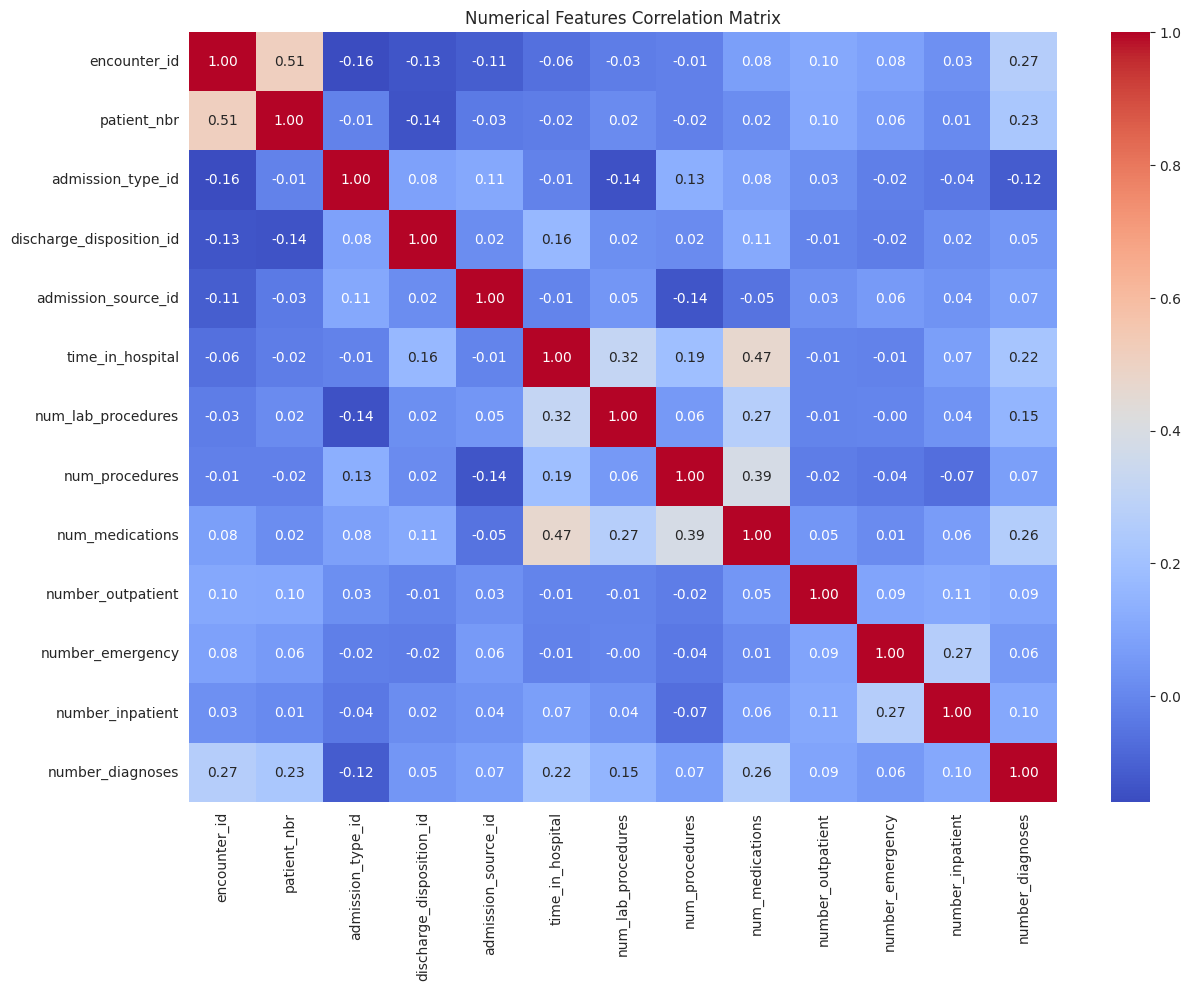

In [5]:
# Target distribution
print("\nTarget variable distribution:")
print(df['readmitted'].value_counts(normalize=True))

# Numerical features summary
print("\nNumerical features summary:")
print(df.select_dtypes(include=np.number).describe().transpose())

# Categorical features summary
cat_cols = df.select_dtypes(include='object').columns
print("\nCategorical features summary:")
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='race', data=df, ax=axes[0, 0])
sns.countplot(x='age', data=df, order=sorted(df['age'].unique()), ax=axes[0, 1])
sns.histplot(df['time_in_hospital'], bins=20, kde=True, ax=axes[1, 0])
sns.countplot(x='readmitted', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(14, 10))
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numerical Features Correlation Matrix')
plt.show()
